<div style="text-align: center; background-color: #0A6EBD; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Lab 02 - TRỰC QUAN HOÁ DỮ LIỆU - TIME SERIES 📌
</div>

<div style="text-align: center; background-color: #5A96E3; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Giai đoạn 2.2 - EDA (tiếp) 📌
</div>

In [17]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.express as px
from statsmodels.tsa.seasonal import seasonal_decompose
warnings.simplefilter('ignore')

### Đọc dữ liệu

In [18]:
df = pd.read_csv('./data/Water_Cleaner_2.csv', parse_dates=['Date'], date_parser=lambda x: pd.to_datetime(x, format='%Y-%m-%d'))

### Câu 1: Thể tích dòng chảy, mực nước ngầm, nhiệt độ, mực nước sông và lượng mưa đã thay đổi như thế nào theo thời gian tại vùng Petrignano?

**Mục đích:**
- Hiểu rõ hơn về xu hướng và sự biến đổi theo thời gian của các yếu tố môi trường quan trọng như lượng mưa, nhiệt độ, mực nước ngầm, thể tích dòng chảy và mực nước sông. Nó giúp xác định các xu hướng theo mùa, sự bất thường, và mối quan hệ giữa các yếu tố này. Từ đó, chúng ta có thể đưa ra các biện pháp quản lý và bảo tồn nguồn nước hiệu quả hơn.

**Các thuộc tính sử dụng:**
- Date: Ngày tháng ghi nhận dữ liệu, dùng làm trục x cho các biểu đồ.
- Drainage_Volume: Thể tích dòng chảy, biểu thị lượng nước được dẫn đi hoặc thoát ra (m3).
- Depth_to_Groundwater: Độ sâu tới mực nước ngầm, biểu thị mực nước ngầm (m).
- Temperature: Nhiệt độ, ảnh hưởng đến sự bốc hơi và khí hậu (°C).
- River_Hydrometry: Mực nước sông, biểu thị lưu lượng và mức nước của sông (m).
- Rainfall: Lượng mưa, ảnh hưởng trực tiếp đến mực nước ngầm và thể tích dòng chảy (mm).

**Biểu đồ sử dụng:** Biểu đồ đường (Line Chart).

**Lý do sử dụng:**
- Biểu đồ đường giúp thể hiện dữ liệu thay đổi theo chuỗi thời gian một cách rõ ràng và hiệu quả, dễ dàng thấy được sự thay đổi liên tục của các thuộc tính theo thời gian.
- Trong trường hợp này, mỗi biểu đồ đường đại diện cho một thuộc tính cụ thể và biểu thị sự biến đổi của thuộc tính đó qua các điểm dữ liệu được nối với nhau bằng các đoạn thẳng.
- Việc sử dụng biểu đồ đường là phù hợp vì chúng ta muốn theo dõi sự biến đổi của các thuộc tính quan trọng. Biểu đồ đường giúp hiển thị mô hình hoặc xu hướng biến đổi của các thuộc tính này một cách rõ ràng và dễ hiểu.
- Dùng thư viện plotly để tăng tính tương tác cho biểu đồ, có thể tự chọn khoảng thời gian mong muốn để nhìn rõ hơn.

In [19]:
# 1. Drainage Volume Over Time
fig1 = go.Figure()
fig1.add_trace(go.Scatter(x=df['Date'], y=df['Drainage_Volume'],
                         mode='lines', name='Drainage Volume'))
fig1.update_layout(
    title='Drainage Volume Over Time',
    xaxis=dict(title='Date', rangeslider=dict(visible=True)),
    yaxis=dict(title='Drainage Volume (m3)')
)
fig1.show()

# 2. Depth to Groundwater Over Time
fig2 = go.Figure()
fig2.add_trace(go.Scatter(x=df['Date'], y=df['Depth_to_Groundwater'],
                         mode='lines', name='Depth to Groundwater'))
fig2.update_layout(
    title='Depth to Groundwater Over Time',
    xaxis=dict(title='Date', rangeslider=dict(visible=True)),
    yaxis=dict(title='Depth to Groundwater (m)')
)
fig2.show()

# 3. Temperature Over Time
fig3 = go.Figure()
fig3.add_trace(go.Scatter(x=df['Date'], y=df['Temperature'],
                         mode='lines', name='Temperature'))
fig3.update_layout(
    title='Temperature Over Time',
    xaxis=dict(title='Date', rangeslider=dict(visible=True)),
    yaxis=dict(title='Temperature (°C)')
)
fig3.show()

# 4. River Hydrometry Over Time
fig4 = go.Figure()
fig4.add_trace(go.Scatter(x=df['Date'], y=df['River_Hydrometry'],
                         mode='lines', name='River Hydrometry'))
fig4.update_layout(
    title='River Hydrometry Over Time',
    xaxis=dict(title='Date', rangeslider=dict(visible=True)),
    yaxis=dict(title='River Hydrometry (m)')
)
fig4.show()

# 5. Rainfall Over Time
fig5 = go.Figure()
fig5.add_trace(go.Scatter(x=df['Date'], y=df['Rainfall'],
                         mode='lines', name='Rainfall'))
fig5.update_layout(
    title='Rainfall Over Time',
    xaxis=dict(title='Date', rangeslider=dict(visible=True)),
    yaxis=dict(title='Rainfall (mm)')
)
fig5.show()


**Nhận xét:**
- Độ sâu đến nguồn nước ngầm đạt giá trị cao nhất vào khoảng tháng 5/6 và giá trị thấp nhất vào khoảng tháng 11/12. Vào các tháng 5/6, đây là thời điểm chuyển tiếp từ mùa xuân sang mùa hè ở nhiều khu vực ôn đới, lượng mưa thường giảm và nhiệt độ bắt đầu tăng cao. Điều này làm giảm lượng nước nạp vào tầng chứa nước ngầm, dẫn đến mực nước ngầm có dấu hiệu hạ thấp. Ngược lại, vào tháng 11/12, thường là sau mùa mưa thu hoặc đầu mùa đông, lượng nước mưa đã tích lũy đủ để thấm vào các tầng chứa nước ngầm, khiến mực nước ngầm dâng cao ở giai đoạn kế.
- Nhiệt độ đạt giá trị cao nhất vào khoảng tháng 8 và giá trị thấp nhất vào khoảng tháng 1.
- Lượng nước thoát ra đạt giá trị cao nhất vào khoảng tháng 6 và giá trị thấp nhất vào khoảng tháng 8/9. Nó mất thời gian lâu hơn để đạt giá trị cao nhất so với việc đạt giá trị thấp nhất. Lượng nước thoát ra (có thể là nước sử dụng cho nông nghiệp hoặc tiêu thoát) đạt đỉnh vào tháng 6 khi nhu cầu nước tưới tiêu cho cây trồng mùa hè là lớn nhất. Vào tháng 8/9, sau mùa thu hoạch và khi nhiệt độ cao làm giảm nhu cầu nước, lượng nước thoát ra giảm đáng kể.
- Lưu lượng nước sông đạt giá trị cao nhất vào khoảng tháng 3 và giá trị thấp nhất vào khoảng tháng 9. Tháng 3 là thời điểm cuối mùa đông hoặc đầu mùa xuân, khi tuyết tan và mưa xuân làm tăng lưu lượng nước sông. Tháng 9 thường là thời điểm sau mùa hè khô hạn, khi lượng nước sông giảm mạnh do bốc hơi cao và lượng mưa ít.
- Lượng nước thoát ra và lưu lượng nước sông đạt giá trị thấp nhất vào khoảng cùng một thời điểm và khi nhiệt độ đạt giá trị cao nhất. Khi nhiệt độ cao nhất vào mùa hè, quá trình bốc hơi tăng cường, giảm thiểu lượng nước có sẵn cả trên bề mặt và trong đất, dẫn đến giảm lượng nước thoát ra và lưu lượng nước sông.
- Nhiệt độ chậm hơn độ sâu đến nguồn nước ngầm khoảng 2 đến 3 tháng. Sự chậm trễ này có thể do thời gian cần thiết để nước mưa thấm xuống các tầng chứa nước ngầm, hoặc do quá trình chuyển nước ngầm vào các hệ thống thoát nước bề mặt.


### Câu 2: Mối quan hệ mùa vụ của các yếu tố thủy văn tại Aquifer Petrignano diễn ra như thế nào trong các năm qua?

**Mục đích:**
- Nhằm phân tích sự biến đổi theo mùa và theo năm của các yếu tố thủy văn chính tại Aquifer Petrignano.
- Giúp xác định các mẫu hình thời gian (seasonality) và xu hướng dài hạn (trends) của các yếu tố như độ sâu đến mực nước ngầm, nhiệt độ, thể tích nước thoát ra, mức nước sông và lượng mưa.
- Hỗ trợ trong việc đưa ra các biện pháp quản lý nguồn nước hiệu quả dựa trên sự hiểu biết về biến động theo mùa và theo năm của các yếu tố thủy văn.

**Các thuộc tính sử dụng:**
- Date: Ngày tháng ghi nhận dữ liệu, dùng làm trục x cho các biểu đồ.
- Drainage_Volume: Thể tích dòng chảy, biểu thị lượng nước được dẫn đi hoặc thoát ra (m3).
- Depth_to_Groundwater: Độ sâu tới mực nước ngầm, biểu thị mực nước ngầm (m).
- Temperature: Nhiệt độ, ảnh hưởng đến sự bốc hơi và khí hậu (°C).
- River_Hydrometry: Mực nước sông, biểu thị lưu lượng và mức nước của sông (m).
- Rainfall: Lượng mưa, ảnh hưởng trực tiếp đến mực nước ngầm và thể tích dòng chảy (mm).

**Biểu đồ sử dụng:** Biểu đồ nhiệt (Heatmap).

**Lý do sử dụng:**
- Biểu đồ nhiệt giúp thể hiện sự biến đổi của các yếu tố theo tháng và năm một cách rõ ràng và trực quan.
- Màu sắc của biểu đồ nhiệt giúp dễ dàng nhận diện các xu hướng và mẫu hình thời gian của các yếu tố thủy văn.
- Giúp người quan sát nhanh chóng nhận ra các giá trị cực đại và cực tiểu theo thời gian, cũng như so sánh sự biến động giữa các năm.
- Heatmap cung cấp thông tin chi tiết về sự khác biệt giữa các tháng trong cùng một năm và giữa các năm, giúp phân tích sâu hơn về sự thay đổi của các yếu tố thủy văn.

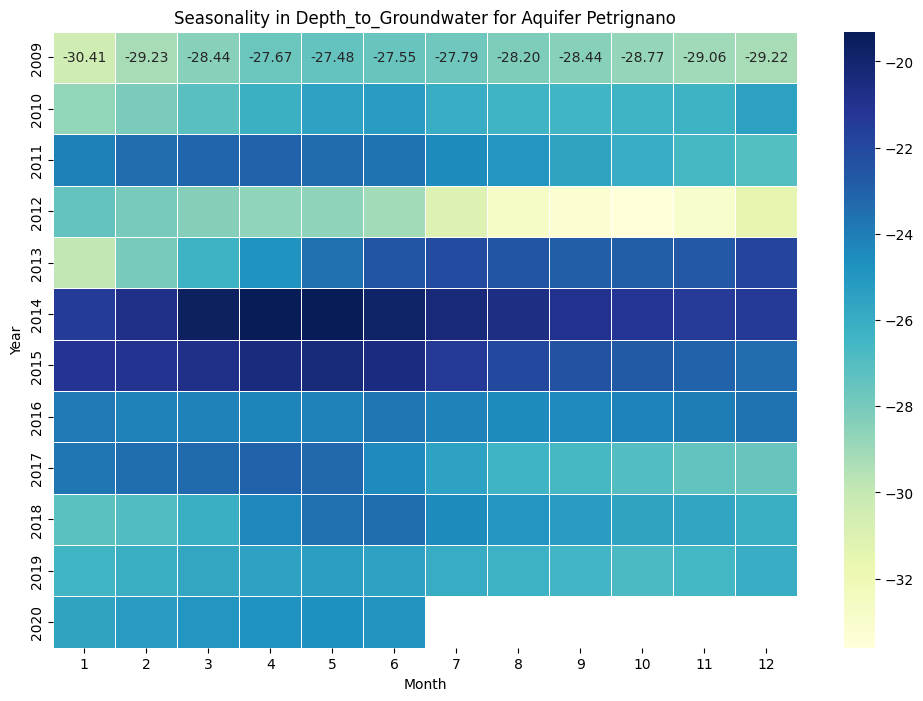

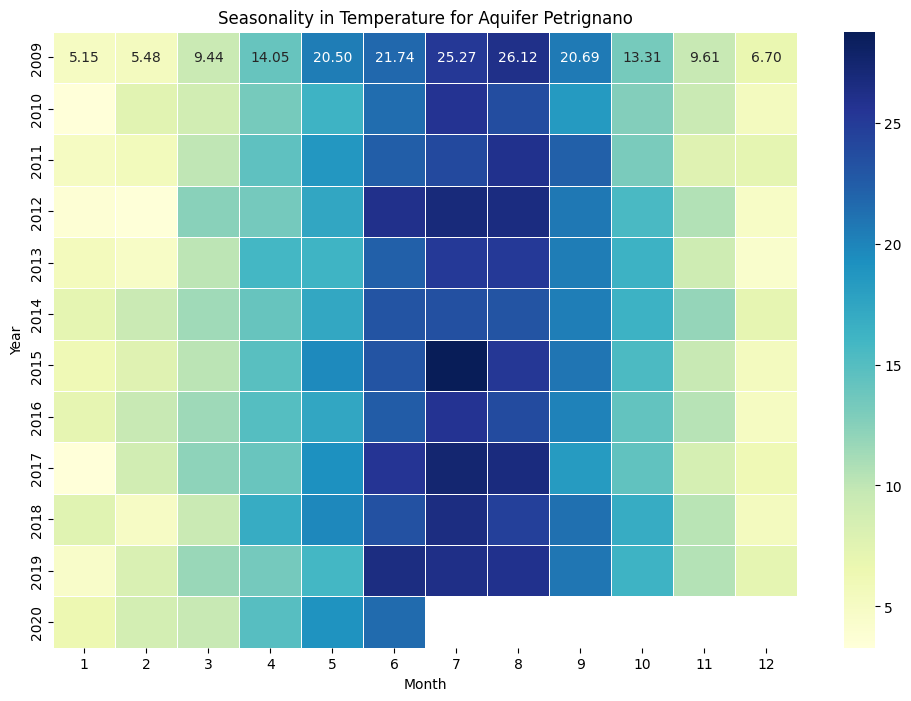

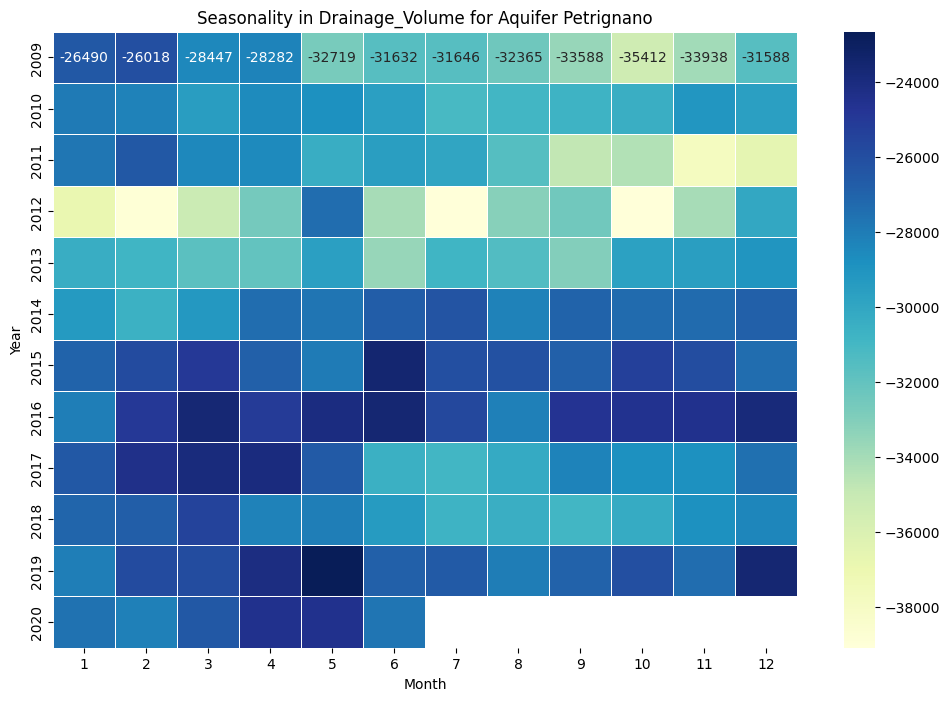

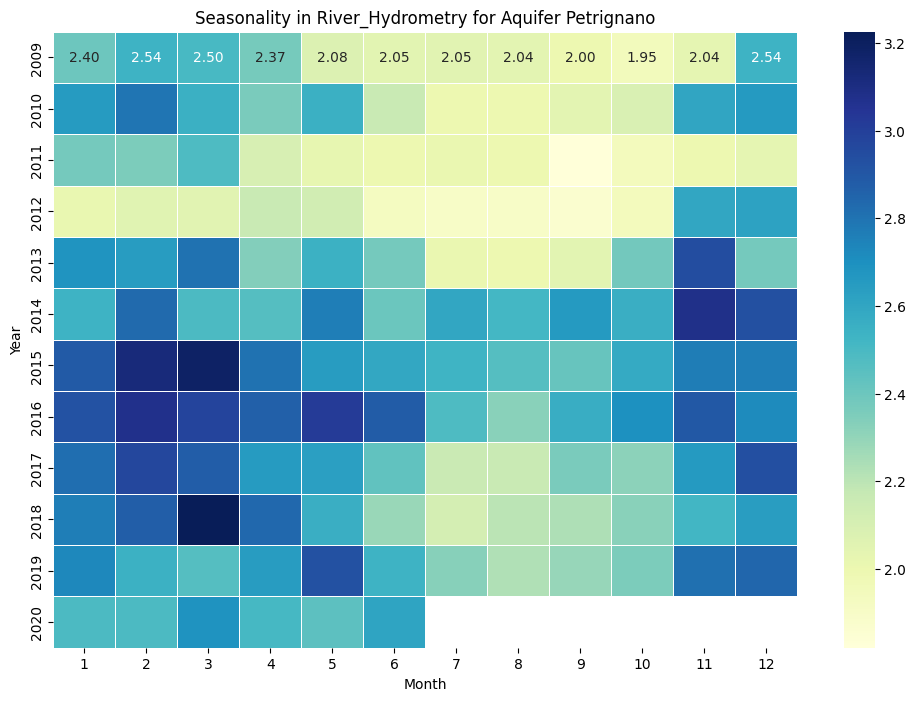

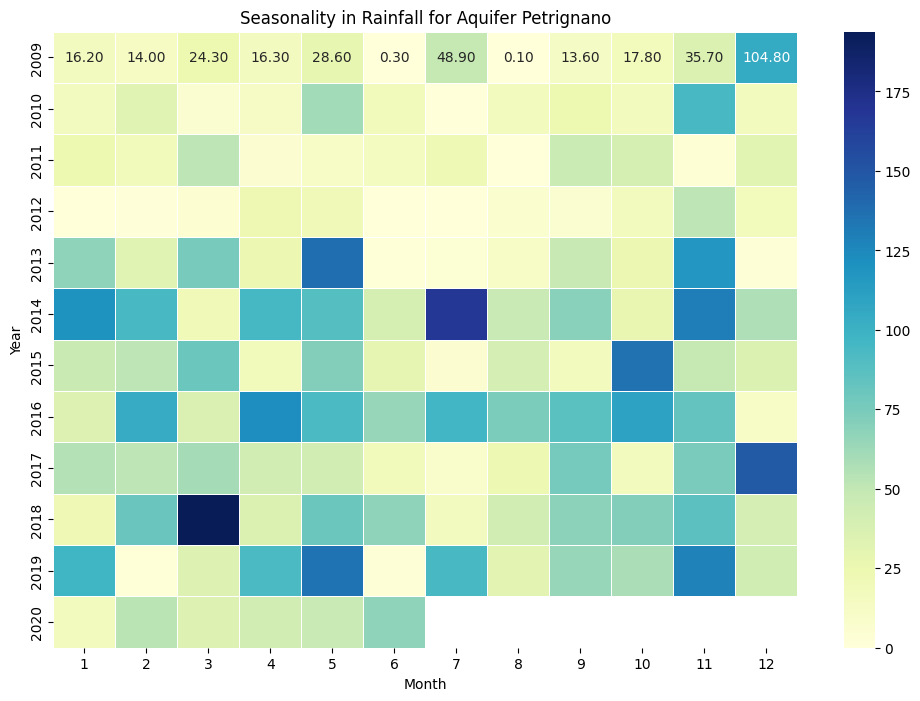

In [20]:
df_new = df[['Date', 'Depth_to_Groundwater', 'Temperature', 'Drainage_Volume', 'River_Hydrometry', 'Rainfall']]
df_new['Month'] = df_new['Date'].dt.month
df_new['Year'] = df_new['Date'].dt.year

heatmap_data = {}
for value in ['Depth_to_Groundwater', 'Temperature', 'Drainage_Volume', 'River_Hydrometry', 'Rainfall']:
    if value == 'Rainfall':
        heatmap_data[value] = df_new.pivot_table(values=value, index='Year', columns='Month', aggfunc='sum')
    else:
        heatmap_data[value] = df_new.pivot_table(values=value, index='Year', columns='Month', aggfunc='mean')
        
for value in heatmap_data:
    plt.figure(figsize=(12, 8))
    if value == 'Drainage_Volume':
        sns.heatmap(heatmap_data[value].round(0), cmap='YlGnBu', annot=True, fmt=".0f", linewidths=.5)
    else:
        sns.heatmap(heatmap_data[value], cmap='YlGnBu', annot=True, fmt=".2f", linewidths=.5)
    plt.title(f'Seasonality in {value} for Aquifer Petrignano')
    plt.xlabel('Month')
    plt.ylabel('Year')
    plt.show()

**Nhận xét:**
- Xu hướng chung (Trend):
    - Mực nước ngầm (Depth_to_Groundwater):
        + Xu hướng tăng từ năm 2009 đến năm 2014 có thể phản ánh sự khô hạn trong khu vực hoặc việc tăng cường sử dụng nước ngầm cho các mục đích công nghiệp và nông nghiệp.
        + Sự ổn định từ năm 2014 đến 2016 có thể kết hợp với các biện pháp bảo vệ môi trường hoặc giảm sử dụng nước ngầm.
        + Giảm trở lại từ năm 2017 đến 2019 có thể là do gia tăng nhu cầu sử dụng nước ngầm hoặc sự thay đổi trong các mô hình thời tiết và mưa lớn hơn.
    - Nhiệt độ (Temperature):
        + Mặc dù không có xu hướng chung rõ ràng, nhưng có thể quan sát thấy sự biến động theo mùa trong nhiệt độ.
        + Có sự tăng dần của nhiệt độ trong cùng tháng qua các năm năm có thể là dấu hiệu của biến đổi khí hậu hoặc tác động của hoạt động con người đối với môi trường tại khu vực này.
    - Thể tích xả (Drainage_Volume):
        + Biến động lớn từ năm này sang năm khác có thể phản ánh sự biến động trong việc quản lý nguồn nước, sự gia tăng hoặc giảm thiểu lượng nước xả, hoặc biến đổi trong môi trường sống.
    - Tỷ trọng kế chỉ mực nước (River_Hydrometry):
        + Sự ổn định từng năm có thể phản ánh sự ổn định trong lưu lượng nước sông, hoặc sự ổn định trong việc sử dụng và quản lý tài nguyên nước.
    - Lượng mưa (Rainfall):
        + Biến động mạnh mẽ từng năm có thể là kết quả của biến đổi khí hậu hoặc các yếu tố tự nhiên khác như các cơn bão.
        + Có thể quan sát thấy sự tăng hoặc giảm đột ngột trong lượng mưa trong một vài năm, điều này có thể ảnh hưởng đến mực nước ngầm và các hệ thống thủy lợi trong khu vực.
- Mùa vụ (Seasonality):
    - Mực nước ngầm (Depth_to_Groundwater):
        + Có thể quan sát thấy sự biến động theo mùa trong mực nước ngầm.
        + Thường thì vào mùa hè (từ tháng 6 đến tháng 8), mực nước ngầm thường cao hơn do lượng mưa lớn và sự chảy vào của nước mưa.
        + Ngược lại, vào các tháng mùa đông (từ tháng 12 đến tháng 2), mực nước ngầm thường thấp nhất do lượng mưa ít và sự cần cù của cây trồng ít hơn.
    - Nhiệt độ (Temperature):
        + Nhiệt độ thường biến động theo mùa trong năm.
        + Thường thì vào mùa hè (từ tháng 6 đến tháng 8), nhiệt độ cao nhất do ảnh hưởng của ánh nắng mặt trời lớn và lượng nhiệt được lưu giữ trong đất.
        + Trái lại, vào mùa đông (từ tháng 12 đến tháng 2), nhiệt độ thường thấp nhất do ít ánh nắng mặt trời và sự ngưng tụ của không khí lạnh.
    - Thể tích xả (Drainage_Volume):
        + Có thể quan sát thấy sự biến động trong thể tích xả theo mùa.
        + Thường thì vào mùa mưa (từ tháng 6 đến tháng 8), thể tích xả lớn hơn do lượng mưa lớn và sự cần thiết để kiểm soát lượng nước dư thừa.
        + Ngược lại, vào mùa khô (từ tháng 12 đến tháng 2), thể tích xả thường ít hơn do lượng mưa ít và nhu cầu sử dụng nước thấp hơn.
    - Tỷ trọng kế chỉ mực nước (River_Hydrometry):
        + Sự biến động theo mùa trong tỷ trọng kế chỉ mực nước thường phản ánh sự thay đổi trong lưu lượng nước sông.
        + Thường thì vào mùa mưa, lượng nước trong sông sẽ tăng, do đó tỷ trọng kế chỉ mực nước cũng sẽ tăng.
        + Ngược lại, vào mùa khô, lượng nước trong sông giảm, tỷ trọng kế chỉ mực nước cũng giảm theo.
    - Lượng mưa (Rainfall):
        + Lượng mưa thường có sự biến động theo mùa.
        + Thường thì vào mùa mưa (từ tháng 6 đến tháng 8), lượng mưa lớn nhất do ảnh hưởng của các hệ thống thời tiết và cơn bão.
        + Ngược lại, vào mùa khô (từ tháng 12 đến tháng 2), lượng mưa ít hơn do ít hơn hoạt động của các hệ thống thời tiết.
- Sự giảm dần của mực nước ngầm trong giai đoạn đầu có thể liên quan đến sự sử dụng không cân nhắc và quá mức của nguồn nước ngầm, cùng với yếu tố thiếu hụt mưa. Sự ổn định tạm thời có thể là kết quả của các biện pháp bảo tồn nước ngầm và chiến lược quản lý tốt hơn. Tuy nhiên, việc mực nước ngầm lại tăng trở lại có thể đòi hỏi sự chú ý đặc biệt đến việc bảo vệ và quản lý nguồn nước ngầm.
- Biến động lớn trong thể tích xả và lượng mưa có thể ảnh hưởng đến sự cân bằng nguồn cung và cầu của nước, đặc biệt là trong việc quản lý hồ chứa và xả lũ.
- Các biến động theo mùa của nhiệt độ và tỷ trọng kế chỉ mực nước cũng cần được xem xét kỹ lưỡng khi lập kế hoạch và thực hiện các biện pháp quản lý nguồn nước.
- Kết luận: Việc hiểu và đánh giá mô hình biến đổi của các chỉ số như mực nước ngầm, nhiệt độ, thể tích xả, tỷ trọng kế chỉ mực nước và lượng mưa là rất quan trọng trong việc bảo tồn và quản lý nguồn nước hiệu quả. Đồng thời, cần phải thực hiện các biện pháp đối phó và điều chỉnh chính sách phù hợp để đảm bảo sự ổn định và bền vững của nguồn nước trong tương lai.

### Câu 3: Những thuộc tính nào có mối quan hệ mật thiết theo thời gian?

**Mục đích:**
- Mục đích của việc trực quan hoá này là để khám phá và hiểu rõ hơn về mối quan hệ giữa các thuộc tính theo thời gian trong tập dữ liệu, tìm ra cặp thuộc tính có độ tương quan cao nhất, chúng ta có thể xác định những mối quan hệ mật thiết giữa chúng và nhận biết xu hướng, biến động theo thời gian của chúng.

**Các thuộc tính sử dụng:**
- Date: Ngày tháng ghi nhận dữ liệu, dùng làm trục x cho các biểu đồ.
- Drainage_Volume: Thể tích dòng chảy, biểu thị lượng nước được dẫn đi hoặc thoát ra (m3).
- Depth_to_Groundwater: Độ sâu tới mực nước ngầm, biểu thị mực nước ngầm (m).
- Temperature: Nhiệt độ, ảnh hưởng đến sự bốc hơi và khí hậu (°C).
- River_Hydrometry: Mực nước sông, biểu thị lưu lượng và mức nước của sông (m).
- Rainfall: Lượng mưa, ảnh hưởng trực tiếp đến mực nước ngầm và thể tích dòng chảy (mm).

**Biểu đồ sử dụng:** Biểu Đồ Nhiệt (Heatmap) và Biểu Đồ Đường (Line Chart)

**Lý do sử dụng:**

- Biểu đồ đường thích hợp cho việc biểu diễn các xu hướng và biến động theo thời gian, trong khi heatmap giúp chúng ta xác định mức độ tương quan giữa các thuộc tính một cách trực quan và tổng quát. Kết hợp cả hai loại biểu đồ sẽ giúp chúng ta hiểu rõ hơn về mối quan hệ giữa các thuộc tính theo thời gian trong tập dữ liệu.

#### Đầu tiên, ta vẽ biểu đồ heatmap để tìm ra cặp dữ liệu có quan hệ mật thiết nhất

In [21]:
df_new = df[['Date','Depth_to_Groundwater','Temperature','Drainage_Volume','River_Hydrometry','Rainfall']]

In [22]:
corr_matrix = df_new.drop('Date', axis=1).corr()
fig = ff.create_annotated_heatmap(z=corr_matrix.values, 
                                  x=list(corr_matrix.columns), 
                                  y=list(corr_matrix.index), 
                                  annotation_text=corr_matrix.round(2).values, 
                                  showscale=True)
fig.update_layout(title='Correlation Matrix Heatmap')
fig.show()

#### Theo như biểu đồ trên, cặp dữ liệu có quan hệ mật thiết nhất là River_Hydrometry và Drainage_Volume (0.64). Ta sẽ tiến hành trực quan hoá 2 biến này theo biến Date bằng đồ thị Line Chart:

In [23]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df['Date'], y=df['Drainage_Volume'],
                    mode='lines',
                    name='Drainage Volume'))

fig.update_layout(yaxis2=dict(title='Depth to Groundwater', overlaying='y', side='right'))

fig.add_trace(go.Scatter(x=df['Date'], y=df['River_Hydrometry'],
                    mode='lines',
                    name='River Hydrometry', yaxis='y2'))

fig.update_layout(title='Drainage Volume and River Hydrometry Over Time',
                   xaxis_title='Date',
                   yaxis_title='Drainage Volume (m3)',  
                   yaxis2_title='River Hydrometry (m)')  

fig.show()


#### Ta tiến hành tính các trung bình của các biến theo năm để theo dõi được sự biến đổi tổng quát hơn:

In [24]:
df_yearly = df.resample('Y', on='Date').mean()

fig = go.Figure()

fig.add_trace(go.Scatter(x=df_yearly.index, y=df_yearly['Drainage_Volume'],
                    mode='lines',
                    name='Drainage Volume'))

fig.update_layout(yaxis2=dict(title='River Hydrometry', overlaying='y', side='right'))

fig.add_trace(go.Scatter(x=df_yearly.index, y=df_yearly['River_Hydrometry'],
                    mode='lines',
                    name='River Hydrometry', yaxis='y2'))

fig.update_layout(title='Drainage Volume and River Hydrometry Over Time',
                   xaxis_title='Date',
                   yaxis_title='Drainage Volume (m3)',  
                   yaxis2_title='River Hydrometry (m)')  

fig.show()


**Nhận xét:**
- Sự tương quan giữa Drainage Volume và River Hydrometry: Dữ liệu cho thấy có một mối quan hệ mật thiết giữa hai thuộc tính này, có thể do chúng đều liên quan đến lượng nước trong hệ thống sông ngòi hoặc đặc điểm địa hình của khu vực. Drainage Volume đo lường lượng nước thoát ra từ hệ thống dẫn nước, trong khi River Hydrometry đo lường sự biến động của lưu lượng nước trong sông. Sự tương quan cao này có thể phản ánh sự ảnh hưởng của việc dẫn nước từ hệ thống dẫn nước tới lượng nước trong sông, hoặc do những yếu tố chung như mưa lớn hoặc điều kiện thời tiết đặc biệt.
- Rainfall (lượng mưa) có thể đã ảnh hưởng trực tiếp đến River_Hydrometry và Drainage_Volume. Khi lượng mưa tăng, mực nước sông tăng lên, từ đó dẫn đến việc tăng cường thoát nước và ngược lại. Đây là lý do chính khiến hai biến này có xu hướng thay đổi cùng nhau.
- Các tầng chứa nước ngầm có thể liên thông với dòng sông, dẫn đến việc thay đổi mực nước sông có thể ảnh hưởng đến lượng nước thoát ra từ hệ thống thoát nước hoặc ngược lại. Sự thay đổi về mức nước ngầm sẽ dẫn đến sự thay đổi về lượng nước thoát ra và mực nước sông.
- Drainage_Volume và River_Hydrometry có mối tương quan cao do ảnh hưởng của các yếu tố thời tiết, hoạt động con người, và đặc tính địa chất tại khu vực. Sự đồng bộ trong biến động của hai biến số này cho thấy mối liên hệ chặt chẽ giữa lượng nước thoát ra và mực nước sông, từ đó cung cấp thông tin quý giá cho việc quản lý nguồn nước hiệu quả. Việc duy trì và điều chỉnh hệ thống quản lý nước theo sự thay đổi của các biến số này là cần thiết để đảm bảo sự bền vững của nguồn nước tại khu vực.

### Câu 4: Độ sâu mực nước thay đổi như thế nào trong năm
**Lý do**: phân tích biến đổi mức độ sâu của nước ngầm theo thời gian trong năm. 

**Mục tiêu**
Phát hiện ra các xu hướng mùa vụ, độ sâu của nước ngầm có thể tăng/ giảm trong các tháng nào

**Thuộc tính:** `Depth_to_Groundwater`, `Temperature`

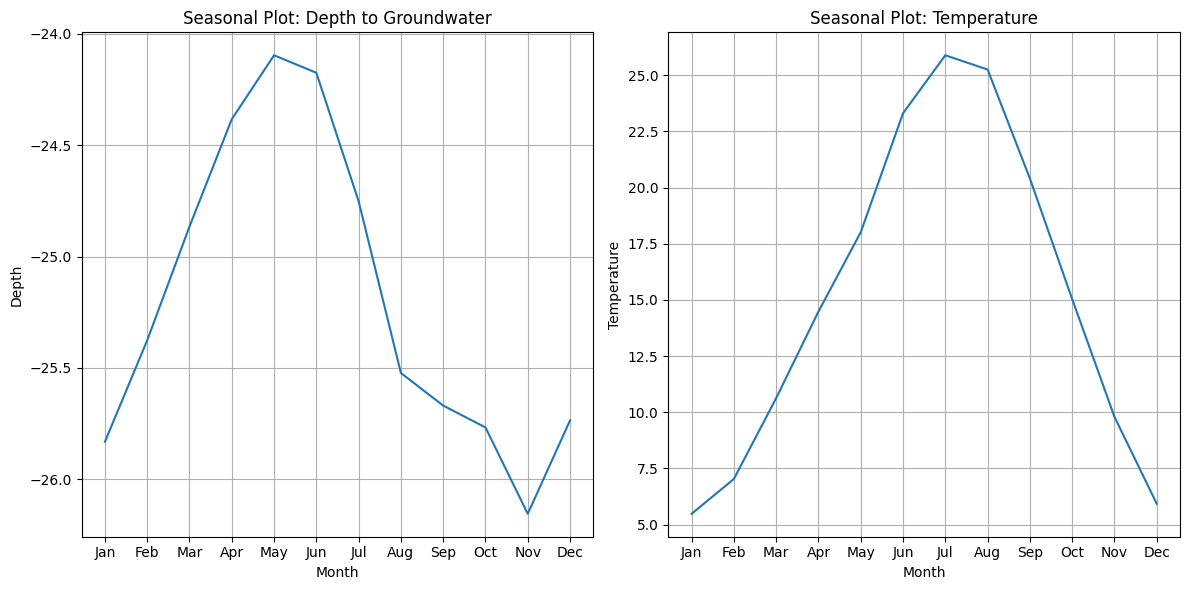

In [25]:
df['Date'] = pd.to_datetime(df['Date'])
plt.figure(figsize=(12,6)) 

plt.subplot(1, 2, 1)
sns.lineplot(x=df['Date'].dt.month, y=df['Depth_to_Groundwater'], ci=None) 
plt.xlabel('Month') 
plt.ylabel('Depth') 
plt.title('Seasonal Plot: Depth to Groundwater') 
plt.xticks(range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']) 
plt.grid(True) 


plt.subplot(1, 2, 2)  
sns.lineplot(x=df['Date'].dt.month, y=df['Temperature'], ci=None) 
plt.xlabel('Month') 
plt.ylabel('Temperature') 
plt.title('Seasonal Plot: Temperature') 
plt.xticks(range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']) 
plt.grid(True) 

plt.tight_layout()  
plt.show()

**Nhận xét**:
Biểu đồ bên trái: Độ sâu mực nước ngầm
- Độ sâu mực nước ngầm thường tăng vào khoảng tháng 1 đến tháng 5 và đạt đỉnh tại tháng năm
- Sau đó giảm dần đến tháng 11 và bắt đầu tăng lại cho năm sau


Biểu đồ bên phải: Nhiệt độ
- Nhiệt độ tăng dần từ tháng 1 đến tháng 6 
- Sau đó giảm dần đến tháng 12 và bắt đầu tăng lại cho năm sau

Nhìn chung, có sự liên quan giữa hai thuộc tính này. 
- Vào mùa hạ nhiệt độ cao dẫn đến mưa nhiều thì mực nước cao hơn
- Ngược lại khi từ mùa thu sang đông, nhiệt độ giảm dần nên mưa ít đi, độ sâu mực nước ngầm giảm

#### Trực quan mực nước ngầm bằng biểu đồ seasonal qua các năm theo tháng

Dùng biểu đồ tĩnh

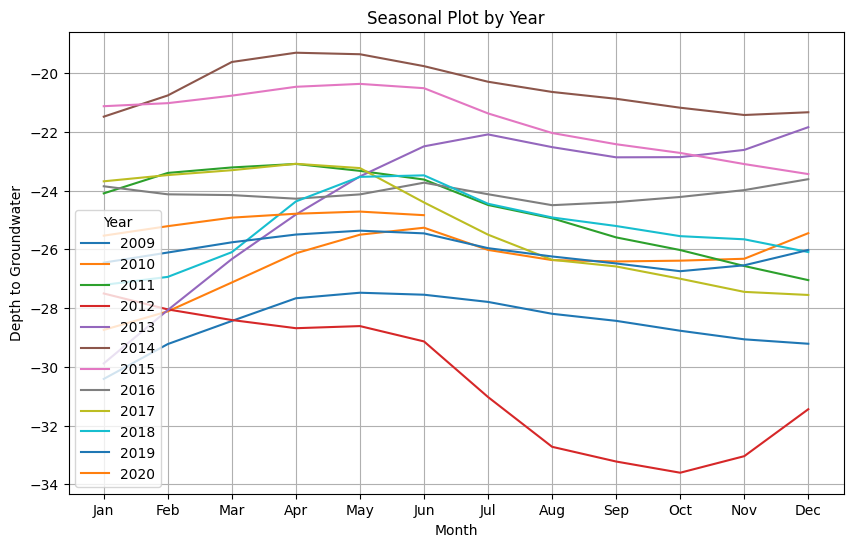

In [26]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Month', y='Depth_to_Groundwater', hue='Year', palette='tab10', ci=None)
plt.xlabel('Month')
plt.ylabel('Depth to Groundwater')
plt.title('Seasonal Plot by Year')
plt.xticks(range(1, 13), labels=[
           'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year')
plt.grid(True)
plt.show()

Dùng biểu đồ có tính tương tác, cho phép ta chọn năm muốn quan sát
Manipulate View: 
- Đường thẳng chuyển động qua các năm
- Muốn xem rõ khoảng thời gian nào thì kéo thả lên vùng đó, đồ thị sẽ phóng to tại nơi ta đã chọn.

In [27]:
df['Year'] = df['Date'].dt.year
df['Week'] = df['Date'].dt.isocalendar().week

fig = go.Figure()

initial_year = df['Year'].min()
initial_data = df[df['Year'] == initial_year]
fig.add_trace(go.Scatter(x=initial_data['Week'], y=initial_data['Depth_to_Groundwater'],
                         mode='lines', name=str(initial_year)))
fig.update_layout(
    title='Seasonal Plot by Week of Year',
    xaxis=dict(title='Week', dtick=5, tickangle=0), 
    yaxis=dict(title='Depth to Groundwater (m)', range=[-45, 0]),  
    updatemenus=[{
        'buttons': [
            {
                'args': [None, {'frame': {'duration': 1000, 'redraw': True},
                                'fromcurrent': True,
                                'transition': {'duration': 500}}],
                'label': 'Play',
                'method': 'animate'
            },
            {
                'args': [[None], {'frame': {'duration': 0, 'redraw': True},
                                  'mode': 'immediate',
                                  'transition': {'duration': 0}}],
                'label': 'Pause',
                'method': 'animate'
            }
        ],
        'direction': 'left',
        'pad': {'r': 10, 't': 87},
        'showactive': False,
        'type': 'buttons',
        'x': 0.1,
        'xanchor': 'right',
        'y': 0,
        'yanchor': 'top'
    }],
    sliders=[{
        'active': 0,
        'yanchor': 'top',
        'xanchor': 'left',
        'currentvalue': {
            'font': {'size': 20},
            'prefix': 'Year:',
            'visible': True,
            'xanchor': 'right'
        },
        'transition': {'duration': 500, 'easing': 'cubic-in-out'},
        'pad': {'b': 10, 't': 50},
        'len': 0.9,
        'x': 0.1,
        'y': 0,
        'steps': [{
            'args': [[year], {'frame': {'duration': 500, 'redraw': True},
                              'mode': 'immediate',
                              'transition': {'duration': 500}}],
            'label': str(year),
            'method': 'animate'
        } for year in df['Year'].unique()]
    }]
)


**Nhận xét**:
- Nhìn chung mực nước các năm đều có xu hướng tăng dần từ khoảng tháng 1 đến tháng 5,6 và bắt đầu giảm dần đến mùa đông
- Độ sâu mực nước ngầm biến động theo năm. Tương đồng với dữ liệu không có tính stationary theo kiểm định trên.
- So với biểu đồ tĩnh, biểu đồ có sự tương tác có phần thuận tiện khi muốn nhìn rõ một tháng bất kì. Trong khi biểu đồ tĩnh giúp ta so sánh được độ sâu mực nước ngầm tháng đó qua các năm.

### Câu 5: Ảnh hưởng của lượng mưa đến mực nước ngầm 

**Mục đích:**
Trong thực tế, mực nước ngầm sẽ dâng cao hơn khi vào mùa mưa khi có những cơn mưa lớn. Tuy nhiên ở bảng tương quan trên lượng mưa lại có tương quan khá yếu với mực nước ngầm, vì vậy ta sẽ xem thử lượng mưa ảnh hưởng gì không với mực nước ngầm 1 tuần sau trận mưa lớn

**Các thuộc tính sử dụng:**
- `Date`: Ngày, tháng, năm thu thập dữ liệu
- `Rainfall` : Lượng mưa biểu thị lượng mưa rơi (mm)
-  `Depth_to_Groundwater` : Độ sâu tới nước ngầm biểu thị mực nước ngầm (m tính từ tầng trệt)

**Biểu đồ sử dụng:** Biểu đồ đường

- Lí do: Vì là biểu thị theo thời gian nên biểu đồ đường có thể thể hiện sự thay đổi theo thời gian. Màu sắc nhằm để phân biệt các ngày mưa lớn khác nhau với nhau

Đầu tiên chọn ra những ngày có lượng mưa lớn hơn 50mm (Theo quy định của Tổ chức Khí tượng thế giới (WMO))

In [28]:
# Chọn những ngày có lượng mưa lớn hơn 50 mm
heavy_rain_days = df[df['Rainfall'] > 50]
#heavy_rain_days['Date'] = pd.to_datetime(heavy_rain_days['Date'])
heavy_rain_days.head()

,Date,Depth_to_Groundwater,Temperature,Drainage_Volume,River_Hydrometry,Rainfall,Depth_to_Groundwater_log,Depth_to_Groundwater_diff_1,Depth_to_Groundwater_diff_2,Year,Month,Week
52,2009-12-31,-29.118571,7.114286,-27844.374857,3.057143,62.1,3.371376,0.110000,0.028571,2009,12,53
230,2013-05-30,-23.092857,15.728571,-28977.202286,2.742857,83.1,3.139523,0.202857,-0.041429,2013,5,22
253,2013-11-07,-22.827143,13.628571,-29746.656000,2.985714,91.0,3.127950,-0.025714,-0.085714,2013,11,45
265,2014-01-30,-21.508571,9.485714,-31132.141714,3.014286,55.4,3.068452,-0.080000,-0.105714,2014,1,5
266,2014-02-06,-21.434286,9.000000,-33363.113143,3.128571,56.3,3.064992,0.074286,0.154286,2014,2,6


Trực quan số trận mưa lớn theo năm: 

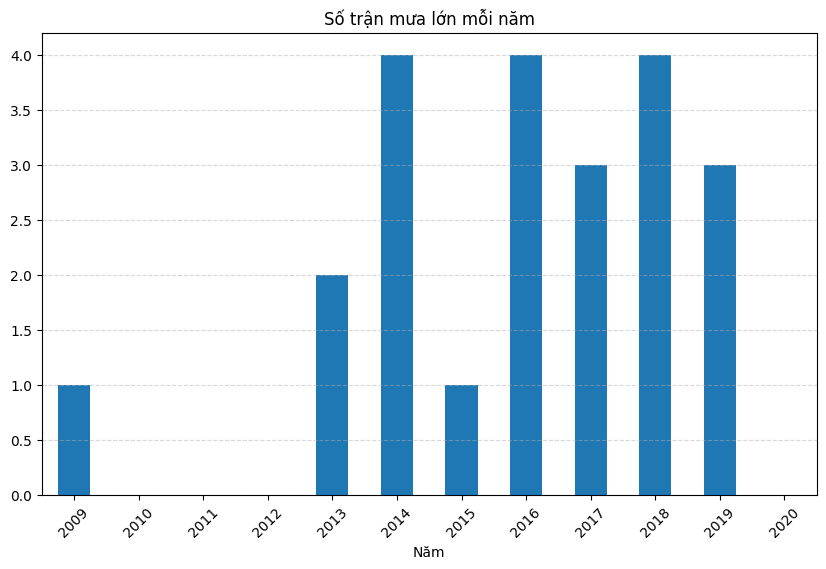

In [29]:
years = df['Date'].dt.year.unique()
heavy_rain_days['Year'] = heavy_rain_days['Date'].dt.year
# Tạo histogram đếm số dòng theo năm
plt.figure(figsize=(10, 6))
#heavy_rain_days['Year'].value_counts().sort_index().plot(kind='bar')
year_counts = heavy_rain_days['Year'].value_counts().reindex(years, fill_value=0)
year_counts.plot(kind='bar')
plt.xlabel('Năm')
plt.title('Số trận mưa lớn mỗi năm')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

- Từ những ngày đã có, ta lấy dữ liệu thu thập sau đó 1 tuần để theo dõi mực nước ngầm thay đổi như nào

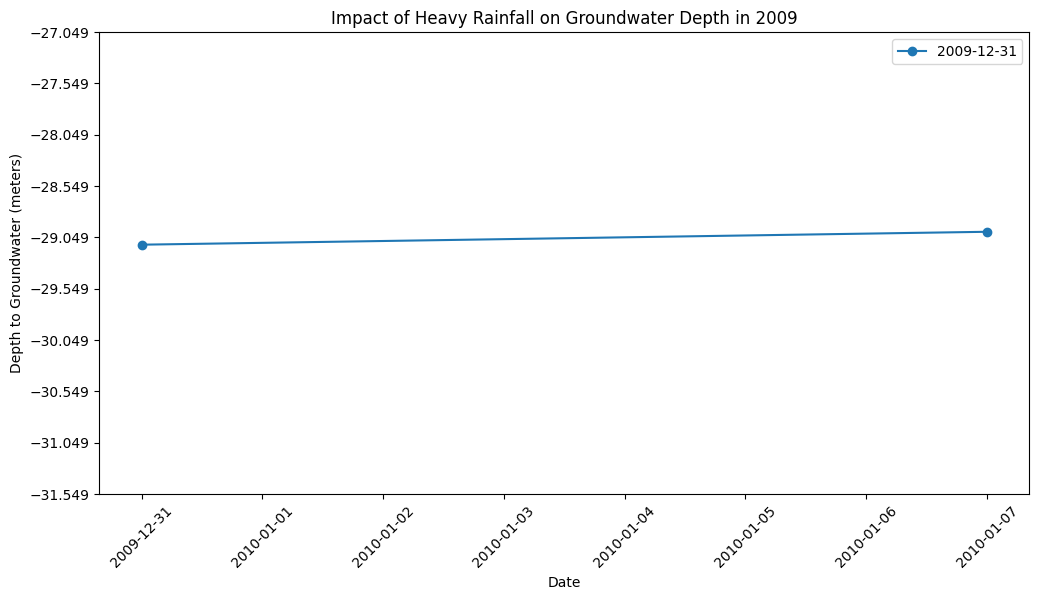

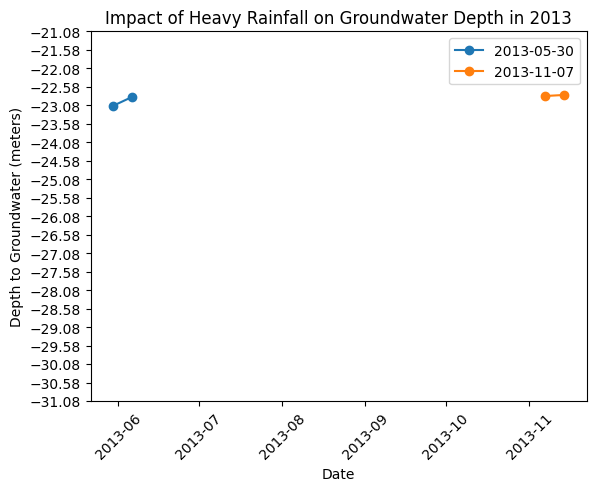

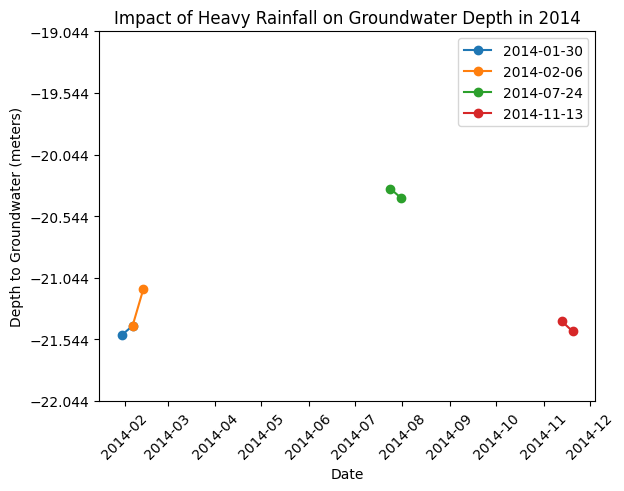

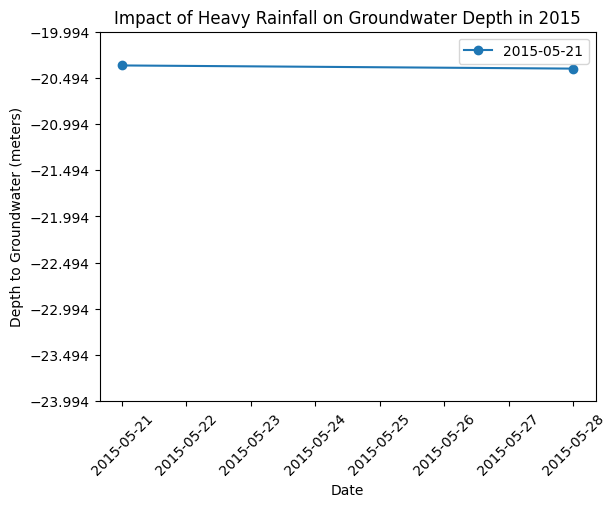

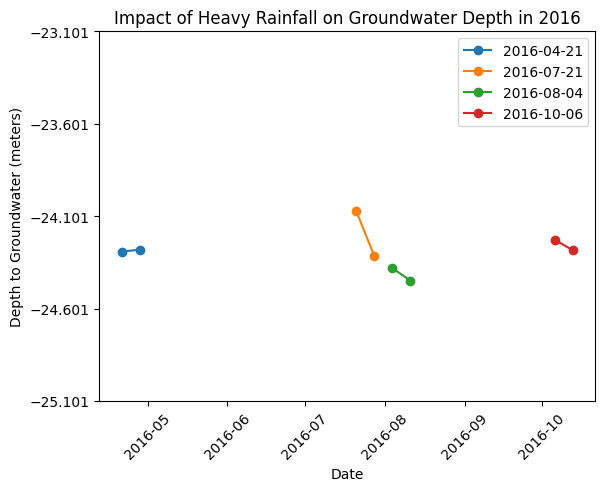

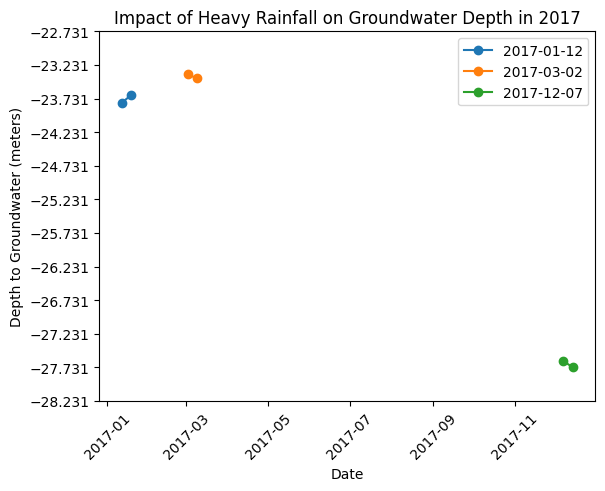

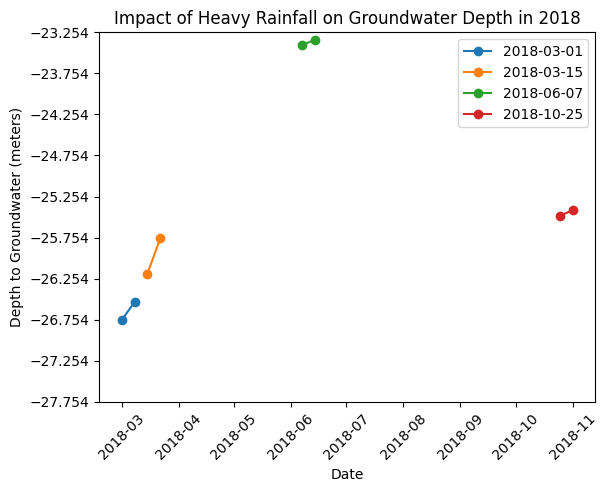

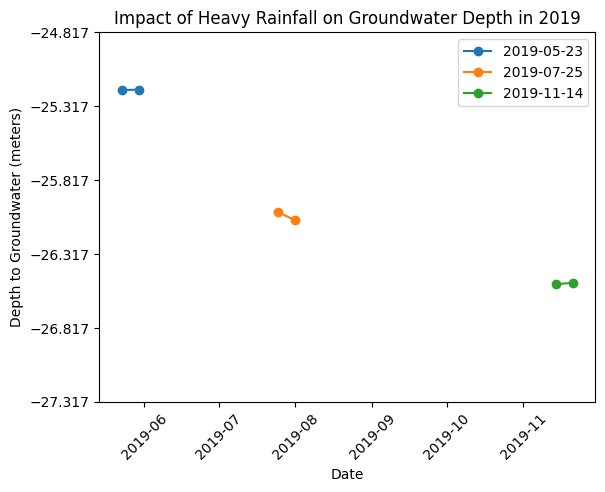

In [30]:
# Trực quan hóa sự thay đổi của mực nước ngầm trong những ngày có lượng mưa lớn và các ngày sau đó
years = heavy_rain_days['Date'].dt.year.unique()
plt.figure(figsize=(12, 6))
for year in years:
    data = df[df['Date'].dt.year == year]
    heavy_rain_days_year = heavy_rain_days[heavy_rain_days['Date'].dt.year == year]
    y_min = data['Depth_to_Groundwater'].min()
    y_max = data['Depth_to_Groundwater'].max()
    for index in heavy_rain_days_year['Date']:
        start_date = index 
        end_date = start_date + pd.Timedelta(weeks=1)
        start_date = pd.to_datetime(start_date)
        end_date = pd.to_datetime(end_date)
        
        period_data = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]
        # Plotting the data
        if not period_data.empty:
            plt.plot(period_data['Date'], period_data['Depth_to_Groundwater'], marker='o', label=f'{start_date.date()}')
    plt.title(f'Impact of Heavy Rainfall on Groundwater Depth in {year}')
    plt.xlabel('Date')
    plt.tick_params(axis='x', rotation=45)
    plt.ylabel('Depth to Groundwater (meters)')
    plt.legend()
    # y_min = period_data['Depth_to_Groundwater'].min()
    # y_max = period_data['Depth_to_Groundwater'].max()
    plt.ylim(y_min, y_max)
    plt.yticks(np.arange(y_min - 0.5, y_max + 0.5, 0.5))
    plt.show()


**Nhận xét:**

- Từ năm sau 2009 đến trước 2013, không có trận mưa lớn nào.
- Có 11 lần sau khi mưa lớn, mực nước ngầm tăng lên. Có 9 lần mực nước ngầm giảm sau khi mưa lớn. 
- Vậy kết quả này phù hợp với mức tương quan dương yếu giữa lượng mưa và mực nước ngầm ở bảng tương quan trên.

### Câu 6: Mối liên hệ giữa nhiệt độ và lưu lượng nước sông

**Mục đích:**
- Khi nhìn vào bảng tương quan ta thấy giữa `Temperature` và `River_Hydrometry` có tương quan âm mạnh nhất vì vậy ta sẽ thử trực quan lên để quan sát

**Các thuộc tính sử dụng:**
- `Date`: Ngày, tháng, năm thu thập dữ liệu
- `Temperature` : Nhiệt độ biểu thị nhiệt độ (°C)
-  `River_Hydrometry`: Tỷ trọng kế chỉ mực nước sông (m)

**Biểu đồ sử dụng:** Biểu đồ phân tán kết hợp đường hồi quy bậc 2

- Lí do: Vì là biểu thị giữa 2 đại lương có mối tương quan nên biểu đồ phân tán sẽ phù hợp kết hợp đường hồi quy để thấy rõ hơn xu hướng 


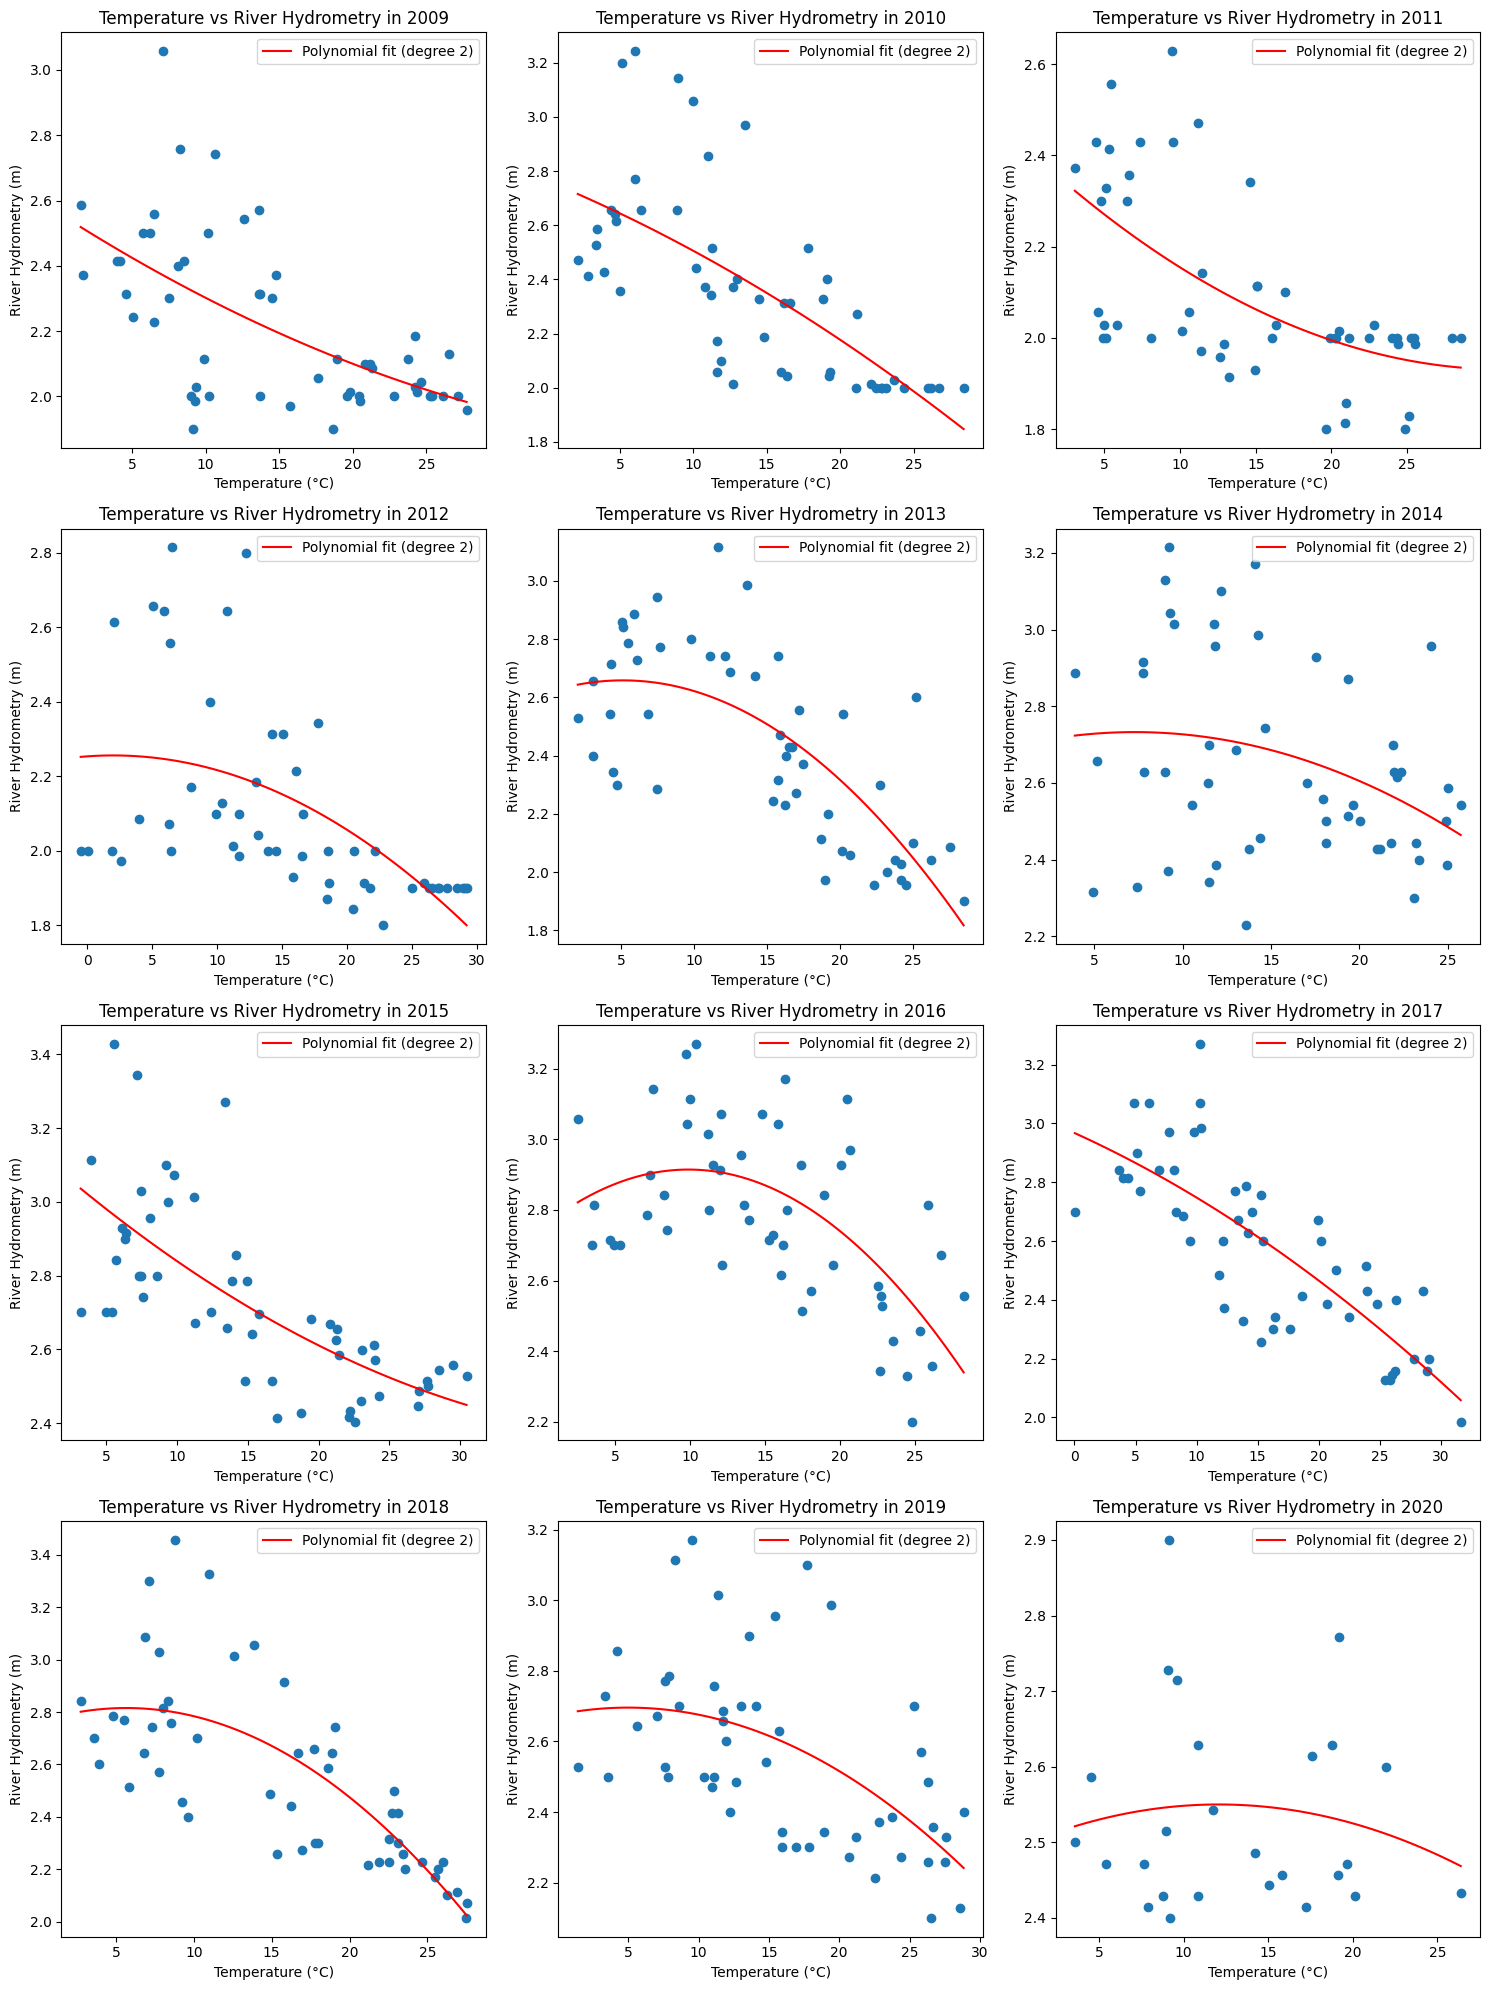

In [31]:
years = df['Date'].dt.year.unique()
degree = 2
ncols = 3
nrows = int(np.ceil(len(years) / ncols)) 

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, nrows * 5))
axes = axes.flatten() 

for i, year in enumerate(years):
    data = df[df['Date'].dt.year == year]
    ax = axes[i]
    
    ax.scatter(data['Temperature'], data['River_Hydrometry'])
    
    # Tính toán các hệ số của đa thức bậc 'degree'
    coeffs = np.polyfit(data['Temperature'], data['River_Hydrometry'], degree)
    p = np.poly1d(coeffs)
    
    # Tạo ra các giá trị x để vẽ đường hồi quy
    x = np.linspace(data['Temperature'].min(), data['Temperature'].max(), 100)
    y = p(x)
    
    # Vẽ đường hồi quy bậc degree
    ax.plot(x, y, color='red', label=f'Polynomial fit (degree {degree})')
    
    ax.set_title(f'Temperature vs River Hydrometry in {year}')
    ax.set_xlabel('Temperature (°C)')
    ax.set_ylabel('River Hydrometry (m)')
    ax.legend()


plt.tight_layout()
plt.show()

**Nhận xét:**
- Nhìn chung dữ liệu có phần khá phân tán tức tương quan không phải quá mạnh giữa 2 đại lượng
- Hầu hết đường hồi quy đều hướng xuống thể hiện đúng tương quan âm giữa Temperature và River Hydrometry

### Câu 7: Tính xu hướng, tính mùa vụ, nhiễu của các yếu tố 


**Lý do**
- **Hiểu rõ cấu trúc dữ liệu**: phân rã chuỗi thời gian thành các thành phần giúp chúng ta hiểu rõ hơn về dữ liệu: nhận diện các xu hướng dài hạn, tính mùa vụ..
- **Phát hiện outlier:** phát hiện ra các điểm dữ liệu bất thường
- **Lựa chọn mô hình phù hợp**: dự vào trend và seasonal để lựa chọn mô hình phù hợp.  Một số mô hình yêu cầu loại bỏ trend như ARIMA trước khi huấn luyện.

Chuỗi thời gian có thể được phân rã theo mô hình cộng thành ba thành phần chính như sau:

$Y(t) = T(t) + S(t) + R(t)$

Trong đó:
- $Y(t)$ là giá trị chuỗi thời gian tại thời điểm $t$.
- $T(t)$ là thành phần xu hướng (trend) tại thời điểm $t$.
- $S(t)$ là thành phần mùa vụ (seasonal) tại thời điểm $t$.
- $R(t)$ là thành phần phần dư(residual) tại thời điểm $t$.

**Lý do không sử dụng mô hình nhân:**
- Vì dữ liệu có cả số âm và số 0 nên ta không dùng mô hình nhân

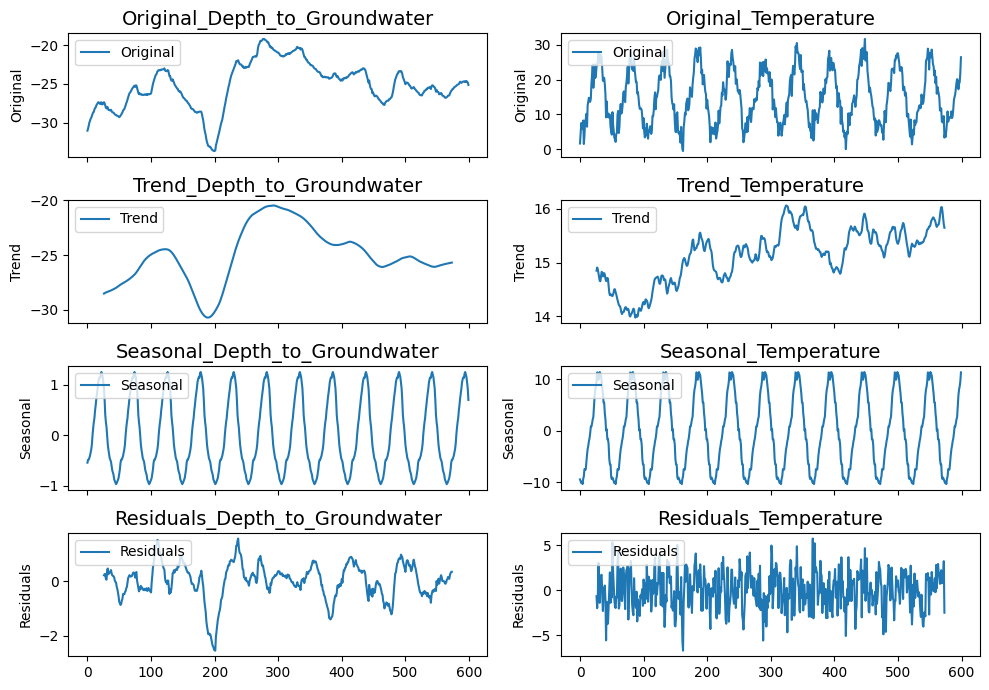

In [32]:
res_add = seasonal_decompose(x=df.Depth_to_Groundwater, model='additive', period=52)

def seas_decomp_plots(original1, original2):
    originals = [original1, original2]
    fig, axes = plt.subplots(4, 2, sharex=True, figsize=(10,7))
    col_names = [original1.name, original2.name]
    y_labels = ['Original', 'Trend', 'Seasonal', 'Residuals']
    
    for i, (original, col_name) in enumerate(zip(originals, col_names)):
        decomposition = seasonal_decompose(x=original, model='additive', period=52)
        
        axes[0, i].plot(original, label='Original')
        axes[0, i].set_title(f'{y_labels[0]}_{col_name}', fontsize=14)
        axes[0, i].legend(loc='upper left')
        axes[0, i].set_ylabel(f'{y_labels[0]}')
        
        axes[1, i].plot(decomposition.trend, label='Trend')
        axes[1, i].set_title(f'{y_labels[1]}_{col_name}', fontsize=14)
        axes[1, i].legend(loc='upper left')
        axes[1, i].set_ylabel(f'{y_labels[1]}')
        
        axes[2, i].plot(decomposition.seasonal, label='Seasonal')
        axes[2, i].set_title(f'{y_labels[2]}_{col_name}', fontsize=14)
        axes[2, i].legend(loc='upper left')
        axes[2, i].set_ylabel(f'{y_labels[2]}')
        
        axes[3, i].plot(decomposition.resid,label='Residuals')
        axes[3, i].set_title(f'{y_labels[3]}_{col_name}', fontsize=14)
        axes[3, i].legend(loc='upper left')
        axes[3, i].set_ylabel(f'{y_labels[3]}')
    
    plt.tight_layout()
    plt.show()
seas_decomp_plots(df.Depth_to_Groundwater, df.Temperature)

**Nhận xét**

Phân rã cột `Depth_to_Groundwater`:
- Trend: Không có xu hướng chung tăng dần hay giảm dần cho cột `Depth_to_Groundwater`
    - Ban đầu, xu hướng tăng rồi  giảm mạnh xuống mức thấp nhất
    - Sau đó, độ sâu mực nước tăng mạnh đến mức tối đa
    - Sau khi chạm đỉnh, mực nước có xu hướng giảm dần, khá ổn định so với hai giai đoạn trước

- Seasonality:
    - Đường mùa vụ có dạng hình sin cho thấy một mô hình lặp lại có chu kỳ ổn định
- Residuals:
    - Residuals dao động từ -2 đến 1 và không thể giải thích được bằng trend hay seasonal.
    - Không có sự tăng/ giảm đều đặn, có các yếu tố ngẫu nhiên trong dữ liệu


Phân rã cột `Temperature`:
- Trend: Không có xu hướng chung tăng dần hay giảm dần cho cột `Temperature`
    - Xu hướng tăng giảm không ổn định
- Seasonality:
    - Đường mùa vụ cho thấy một mô hình lặp lại có chu kỳ rõ ràng.
    - Mỗi chu kỳ dao động từ -10 đến 10, cho thấy sự thay đổi nhiệt độ định kỳ trong năm.
    - Điều này có thể liên quan đến các mùa trong năm, nhiệt độ cao hơn vào mùa hè và thấp hơn vào mùa đông.
- Residuals:
    - Phần dư dao động từ -5 đến 5 và không có tính chu kì
    - dao động này cho thấy các yếu tố ngẫu nhiên hoặc nhiễu không thể giải thích bởi trend hay seasonal.